In [134]:
import os
import sqlite3


conn = sqlite3.connect("addresses.db")
conn.enable_load_extension(True)
conn.load_extension(os.environ.get("SPATIALITE_EXTENSION", "/usr/lib/x86_64-linux-gnu/mod_spatialite.so"))
conn.execute("select InitSpatialMetadata(1)")
c = conn.cursor()

In [47]:
# number of UPRNs
c.execute("SELECT count(*) FROM uprn")
uprn_total = c.fetchone()[0]
print(f"{uprn_total:,}")

39,095,248


In [48]:
# number of postcodes
c.execute("SELECT count(*) FROM postcode")
postcode_total = c.fetchone()[0]
print(f"{postcode_total:,}")

2,643,728


In [49]:
# postcodes with the most number of UPRNs ..
c.execute("""
SELECT postcode, count(*)
FROM uprn
GROUP BY postcode
ORDER BY count(*) DESC
LIMIT 50
""")
c.fetchall()

[('CV4 7ES', 6276),
 ('NR4 7TJ', 4725),
 ('CO4 3SQ', 3303),
 ('SA1 8EP', 2044),
 ('HG3 5JL', 1570),
 ('PO20 9BH', 1546),
 ('CF14 3UU', 1496),
 ('YO25 8SY', 1478),
 ('DL8 4AT', 1476),
 ('CF37 1DL', 1468),
 ('LE11 3TZ', 1442),
 ('LS16 5PT', 1287),
 ('BN1 9BJ', 1280),
 ('CV4 7AL', 1273),
 ('L3 5UE', 1268),
 ('UB8 3PH', 1216),
 ('CF14 3UX', 1164),
 ('L6 1AH', 1159),
 ('YO15 3QN', 1151),
 ('BN1 9RJ', 1148),
 ('LS2 8PD', 1146),
 ('PE25 1LX', 1142),
 ('M14 6FZ', 1123),
 ('WC1H 9EN', 1106),
 ('BN1 9RP', 1087),
 ('IV27 4NZ', 1066),
 ('AL10 9UF', 1043),
 ('E14 9GE', 1034),
 ('E14 7TZ', 1020),
 ('NN1 5PH', 1011),
 ('OX3 0BD', 999),
 ('LS2 9EL', 988),
 ('CW1 5NP', 977),
 ('AL10 9UZ', 977),
 ('L3 5GA', 965),
 ('B4 7XG', 950),
 ('E1 7AB', 934),
 ('SW17 0PZ', 933),
 ('LS18 5HD', 932),
 ('LN4 4LR', 925),
 ('CT2 7BQ', 909),
 ('HU6 7EL', 908),
 ('LS2 8BY', 907),
 ('G3 8PX', 895),
 ('L6 1BA', 891),
 ('CO2 8GY', 891),
 ('SS8 0DB', 877),
 ('KT6 5PJ', 864),
 ('WC1H 0AQ', 863),
 ('E15 2DA', 863)]

In [41]:
# number of UPRNs where ONSUD and ONSPD differ
c.execute("""
SELECT
  COUNT(*)
  FROM uprn
  INNER JOIN postcode
  ON postcode.postcode = uprn.postcode
  WHERE uprn.onsud != postcode.onspd
""")
onsud_onspd_differ = c.fetchone()[0]
print(f"{onsud_onspd_differ:,}")

393,693


In [42]:
# percentage of GB UPRNs where ONSUD and ONSPD differ
print("%2.2f%%" % (onsud_onspd_differ / uprn_total * 100))

1.01%


In [117]:
# postcodes with UPRNs which are attributed to different LAs by ONSUD
c.execute("""
SELECT COUNT(DISTINCT onsud) count, postcode
  FROM uprn
  GROUP BY postcode
  ORDER BY count DESC
""")

def dict_from_fetch(l):
    d = dict()
    for a, b in l:
        d.setdefault(a, [])
        d[a].append(b)
    return d

postcode_lad_count = dict_from_fetch(c.fetchall())
postcode_lad_counts = array([(n, len(postcode_lad_count[n])) for n in sorted(postcode_lad_count)])
print(postcode_lad_counts)

[(1, 1698266), (2, 15992), (3, 227), (4, 1)]


In [135]:
%config InlineBackend.figure_formats = ['svg']
import matplotlib.pyplot as plt
%matplotlib inline
from numpy import array

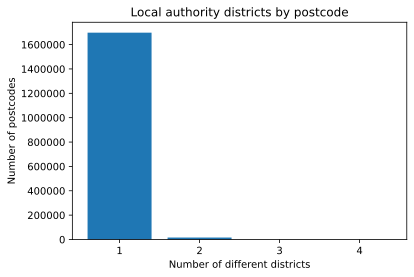

In [154]:
fig, ax = plt.subplots()
data = array(postcode_lad_counts)
ax.set_title('Local authority districts by postcode')
ax.set_xlabel("Number of different districts")
ax.set_ylabel("Number of postcodes")
x = data[:, :-1].flatten()
y = data[:, -1]
plt.xticks( x )
ax.ticklabel_format(style='plain')
p = plt.bar(x, y)

In [112]:
# postcodes with 3 or 4 multiple local authority districts
print([(n, postcode_lad_count[n]) for n in sorted(postcode_lad_count, reverse=True) if n > 2])

[(4, ['BN15 0AY']), (3, ['YO32 5TP', 'YO23 3PA', 'WV15 6HS', 'WV14 8TU', 'WV14 8NH', 'WS15 3NW', 'WS12 4PT', 'WR5 3HR', 'WF8 3JF', 'WF2 0SB', 'WD3 9YD', 'WD25 8PZ', 'WD19 4BE', 'WC2A 2LL', 'WA4 4EB', 'WA3 5LH', 'UB5 4DT', 'TS8 9DY', 'TS21 1LX', 'TS2 1UB', 'TQ9 6QB', 'TQ3 1SY', 'TN3 8JH', 'TN27 9JE', 'TN27 8LD', 'TN25 5JF', 'TN16 2NS', 'TF9 2SH', 'TF10 8DS', 'TA7 9BN', 'TA20 3RU', 'SY20 9LD', 'SY13 4HB', 'SW15 3QF', 'SW15 1LB', 'ST7 3PX', 'ST7 3PG', 'ST3 6HJ', 'ST10 4PF', 'SS8 0PY', 'SS8 0PS', 'SS6 7UA', 'SS11 8SG', 'SP5 5RA', 'SO40 3QS', 'SO16 3DQ', 'SN8 2JX', 'SN6 6JZ', 'SL6 0JA', 'SK17 0TG', 'SG9 0BH', 'SG7 5JH', 'SE12 9EZ', 'SA9 2XH', 'SA8 4RU', 'S80 3DZ', 'S6 6GL', 'S44 6AE', 'S36 4HH', 'S21 3UB', 'S17 3BB', 'S10 4QZ', 'RM14 3PB', 'RH6 9ST', 'RH6 0EL', 'RH5 6NS', 'RH19 3PR', 'RH12 3BE', 'RH12 3AP', 'RG7 2BG', 'RG2 6GF', 'RG2 6AT', 'PR4 1UN', 'PR3 1UT', 'PO16 9DR', 'PL20 6SG', 'PL15 9QX', 'PH22 1RB', 'PH15 2PX', 'PE6 7QB', 'PE13 5RF', 'PA36 4AG', 'OX29 4DE', 'OX15 5BX', 'OL3 5UN', '

In [ ]:
# d with UPRNs attributed to 3 or more LAs by ONSUD
c.execute("""
SELECT count, postcode
FROM (SELECT COUNT(DISTINCT onsud) count, postcode
  FROM uprn
  GROUP BY postcode
  ORDER BY count DESC)
WHERE count > 2
""")
c.fetchall()